**torch_snippets** is a Python library designed to simplify machine learning and deep learning tasks within PyTorch projects.
It offers utilities for data handling, model training, evaluation, and visualization, streamlining the development process.
With its convenient functions and tools, users can focus on core aspects of their projects, minimizing the need for writing boilerplate code.


In [1]:
!pip install -q torch_snippets
from torch_snippets import *
device = "cuda" if torch.cuda.is_available() else "cpu"
from torchvision.utils import make_grid

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.6/106.6 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.7/84.7 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 218.7/218.7 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 44.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 kB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 42.5 MB/s eta 0:00:00


NameError: name 'torch' is not defined

The `torch.utils.data.DataLoader` function is used to create a data loader for handling datasets in PyTorch. In this case, it's loading the MNIST dataset.

- `MNIST('~/data', train=True, download=True, transform=transform)`: This part specifies the MNIST dataset to be loaded. It's configured to download the dataset if it's not already available locally, and `transform` is applied to preprocess the data.

- `batch_size=128`: This parameter sets the batch size, meaning that the data will be divided into batches of 128 samples each.

- `shuffle=True`: This parameter shuffles the data at every epoch, which helps in randomizing the order of samples presented to the model during training, preventing it from learning the order of the data.

- `drop_last=True`: This parameter specifies that if there are any incomplete batches (i.e., batches with fewer samples than the specified batch size), they should be dropped rather than padded to match the batch size. This is commonly done to avoid training on incomplete or biased batches.


In [ ]:
from torchvision.datasets import MNIST
from torchvision import transforms

transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=(0.5,), std=(0.5,))
])

data_loader = torch.utils.data.DataLoader(MNIST('~/data', train=True, download=True, transform=transform),batch_size=128, shuffle=True, drop_last=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 37662331.38it/s]


Extracting /root/data/MNIST/raw/train-images-idx3-ubyte.gz to /root/data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1288074.67it/s]


Extracting /root/data/MNIST/raw/train-labels-idx1-ubyte.gz to /root/data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 9520054.78it/s]


Extracting /root/data/MNIST/raw/t10k-images-idx3-ubyte.gz to /root/data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 6084486.99it/s]

Extracting /root/data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /root/data/MNIST/raw



In [ ]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(784, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )
    def forward(self, x): return self.model(x)

In [ ]:
discriminator = Sequential(
    Conv2d(in_channels=3, out_channels=16, kernel_size=4, stride=2, padding=1, bias=False),
    LeakyReLU(0.2),
    Conv2d(in_channels=16, out_channels=32, kernel_size=4, stride=2, padding=1, bias=False),
    BatchNorm2d(32),
    LeakyReLU(0.2),
    Conv2d(in_channels=32, out_channels=64, kernel_size=4, stride=2, padding=1, bias=False),
    BatchNorm2d(64),
    LeakyReLU(0.2),
    Conv2d(in_channels=64, out_channels=128, kernel_size=4, stride=2, padding=1, bias=False),
    BatchNorm2d(128),
    LeakyReLU(0.2),
    Conv2d(in_channels=128, out_channels=1, kernel_size=4, stride=1, padding=0, bias=False),
    Sigmoid()
)

In [ ]:
!pip install torch_summary
from torchsummary import summary
discriminator = Discriminator().to(device)
summary(discriminator,torch.zeros(1,784))

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 1]                   --
|    └─Linear: 2-1                       [-1, 1024]                803,840
|    └─LeakyReLU: 2-2                    [-1, 1024]                --
|    └─Dropout: 2-3                      [-1, 1024]                --
|    └─Linear: 2-4                       [-1, 512]                 524,800
|    └─LeakyReLU: 2-5                    [-1, 512]                 --
|    └─Dropout: 2-6                      [-1, 512]                 --
|    └─Linear: 2-7                       [-1, 256]                 131,328
|    └─LeakyReLU: 2-8                    [-1, 256]                 --
|    └─Dropout: 2-9                      [-1, 256]                 --
|    └─Linear: 2-10                      [-1, 1]                   257
|    └─Sigmoid: 2-11                     [-1, 1]                   --
Total params: 1,460,225
Trainable params: 1,460,225
Non-trainable par

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 1]                   --
|    └─Linear: 2-1                       [-1, 1024]                803,840
|    └─LeakyReLU: 2-2                    [-1, 1024]                --
|    └─Dropout: 2-3                      [-1, 1024]                --
|    └─Linear: 2-4                       [-1, 512]                 524,800
|    └─LeakyReLU: 2-5                    [-1, 512]                 --
|    └─Dropout: 2-6                      [-1, 512]                 --
|    └─Linear: 2-7                       [-1, 256]                 131,328
|    └─LeakyReLU: 2-8                    [-1, 256]                 --
|    └─Dropout: 2-9                      [-1, 256]                 --
|    └─Linear: 2-10                      [-1, 1]                   257
|    └─Sigmoid: 2-11                     [-1, 1]                   --
Total params: 1,460,225
Trainable params: 1,460,225
Non-trainable par

In [ ]:
generator = Sequential(
    ConvTranspose2d(in_channels=100, out_channels=128, kernel_size=4, stride=1, padding=0, bias=False),
    BatchNorm2d(128),
    LeakyReLU(0.2),
    ConvTranspose2d(in_channels=128, out_channels=64, kernel_size=4, stride=2, padding=1, bias=False),
    BatchNorm2d(64),
    LeakyReLU(0.2),
    ConvTranspose2d(in_channels=64, out_channels=32, kernel_size=4, stride=2, padding=1, bias=False),
    BatchNorm2d(32),
    LeakyReLU(0.2),
    ConvTranspose2d(in_channels=32, out_channels=16, kernel_size=4, stride=2, padding=1, bias=False),
    BatchNorm2d(16),
    LeakyReLU(0.2),
    ConvTranspose2d(in_channels=16, out_channels=3, kernel_size=4, stride=2, padding=1, bias=False),
    Tanh()
)

In [ ]:
generator = Generator().to(device)
summary(generator,torch.zeros(1,100,1,1))

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 784]                 --
|    └─Linear: 2-1                       [-1, 256]                 25,856
|    └─LeakyReLU: 2-2                    [-1, 256]                 --
|    └─Linear: 2-3                       [-1, 512]                 131,584
|    └─LeakyReLU: 2-4                    [-1, 512]                 --
|    └─Linear: 2-5                       [-1, 1024]                525,312
|    └─LeakyReLU: 2-6                    [-1, 1024]                --
|    └─Linear: 2-7                       [-1, 784]                 803,600
|    └─Tanh: 2-8                         [-1, 784]                 --
Total params: 1,486,352
Trainable params: 1,486,352
Non-trainable params: 0
Total mult-adds (M): 2.97
Input size (MB): 0.00
Forward/backward pass size (MB): 0.02
Params size (MB): 5.67
Estimated Total Size (MB): 5.69


Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 784]                 --
|    └─Linear: 2-1                       [-1, 256]                 25,856
|    └─LeakyReLU: 2-2                    [-1, 256]                 --
|    └─Linear: 2-3                       [-1, 512]                 131,584
|    └─LeakyReLU: 2-4                    [-1, 512]                 --
|    └─Linear: 2-5                       [-1, 1024]                525,312
|    └─LeakyReLU: 2-6                    [-1, 1024]                --
|    └─Linear: 2-7                       [-1, 784]                 803,600
|    └─Tanh: 2-8                         [-1, 784]                 --
Total params: 1,486,352
Trainable params: 1,486,352
Non-trainable params: 0
Total mult-adds (M): 2.97
Input size (MB): 0.00
Forward/backward pass size (MB): 0.02
Params size (MB): 5.67
Estimated Total Size (MB): 5.69

In [ ]:
def noise(size):
    n = torch.randn(size, 100)
    return n.to(device)

In [ ]:
def discriminator_train_step(real_data, fake_data):
    d_optimizer.zero_grad()
    prediction_real = discriminator(real_data)
    error_real = loss(prediction_real, torch.ones(len(real_data), 1).to(device))
    error_real.backward()
    prediction_fake = discriminator(fake_data)
    error_fake = loss(prediction_fake, torch.zeros(len(fake_data), 1).to(device))
    error_fake.backward()
    d_optimizer.step()
    return error_real + error_fake

In [ ]:
# def discriminator_train_step(real_data, fake_data):
#     # Reset gradients of the discriminator optimizer
#     d_optimizer.zero_grad()

#     # Pass real data through the discriminator and calculate the predictions
#     prediction_real = discriminator(real_data)
#     # Compute the loss for the discriminator based on real data
#     error_real = loss(prediction_real, torch.ones(len(real_data), 1).to(device))
#     # Backpropagate the gradients for real data
#     error_real.backward()

#     # Pass fake data through the discriminator and calculate the predictions
#     prediction_fake = discriminator(fake_data)
#     # Compute the loss for the discriminator based on fake data
#     error_fake = loss(prediction_fake, torch.zeros(len(fake_data), 1).to(device))
#     # Backpropagate the gradients for fake data
#     error_fake.backward()

#     # Update the discriminator parameters using the gradients
#     d_optimizer.step()

#     # Return the sum of the real and fake errors (total discriminator error)
#     return error_real + error_fake


## Approch -2

In [ ]:
def discriminator_train_step(real_data, fake_data):
    # Reset gradients of the discriminator optimizer
    d_optimizer.zero_grad()

    # Pass real data through the discriminator and calculate the predictions
    prediction_real = discriminator(real_data)
    # Compute the loss for the discriminator based on real data
    error_real = loss(prediction_real, torch.ones(len(real_data), 1).to(device))

    # Pass fake data through the discriminator and calculate the predictions
    prediction_fake = discriminator(fake_data)
    # Compute the loss for the discriminator based on fake data
    error_fake = loss(prediction_fake, torch.zeros(len(fake_data), 1).to(device))

    # Compute the total loss as the sum of real and fake losses
    total_loss = 0.5*(error_real + error_fake)

    # Backpropagate the gradients for the total loss
    total_loss.backward()

    # Update the discriminator parameters using the gradients
    d_optimizer.step()

    # Return the total loss
    return total_loss


In [ ]:
def generator_train_step(fake_data):
    g_optimizer.zero_grad()
    prediction = discriminator(fake_data)
    error = loss(prediction, torch.ones(len(real_data), 1).to(device))
    error.backward()
    g_optimizer.step()
    return error

In [ ]:
# def generator_train_step(fake_data):
#     # Reset gradients of the generator optimizer
#     g_optimizer.zero_grad()

#     # Pass fake data through the discriminator and calculate the predictions
#     prediction = discriminator(fake_data)

#     # Compute the loss for the generator based on the discriminator's response to fake data
#     # Here, we aim to maximize the discriminator's prediction of fake data being real (ones)
#     error = loss(prediction, torch.ones(len(fake_data), 1).to(device))

#     # Backpropagate the gradients for the generator's loss
#     error.backward()

#     # Update the generator parameters using the gradients
#     g_optimizer.step()

#     # Return the generator's loss
#     return error


In [ ]:
discriminator = Discriminator().to(device)
generator = Generator().to(device)
d_optimizer = optim.Adam(discriminator.parameters(), lr=0.0002)
g_optimizer = optim.Adam(generator.parameters(), lr=0.0002)
loss = nn.BCELoss()
num_epochs = 10 #200
log = Report(num_epochs)

In [ ]:
# Instantiate the discriminator and generator models and move them to the specified device (e.g., GPU if available)
discriminator = Discriminator().to(device)
generator = Generator().to(device)

# Define optimizers for the discriminator and generator, using the Adam optimizer with a learning rate of 0.0002
d_optimizer = optim.Adam(discriminator.parameters(), lr=0.0002)
g_optimizer = optim.Adam(generator.parameters(), lr=0.0002)

# Define the loss function for the adversarial training, which is Binary Cross Entropy Loss
loss = nn.BCELoss()

# Set the number of training epochs
num_epochs = 5

# Create a reporting mechanism to track and visualize the training progress
log = Report(num_epochs)


EPOCH: 1.000  g_loss: 2.993  d_loss: 0.483  (20.24s - 80.97s remaining)
EPOCH: 2.000  g_loss: 1.834  d_loss: 0.518  (37.77s - 56.65s remaining)
EPOCH: 3.000  g_loss: 2.147  d_loss: 0.414  (53.62s - 35.74s remaining)
EPOCH: 4.000  g_loss: 2.649  d_loss: 0.345  (69.76s - 17.44s remaining)
EPOCH: 5.000  g_loss: 3.111  d_loss: 0.241  (86.26s - 0.00s remaining)


100%|██████████| 106/106 [00:00<00:00, 1103.44it/s]


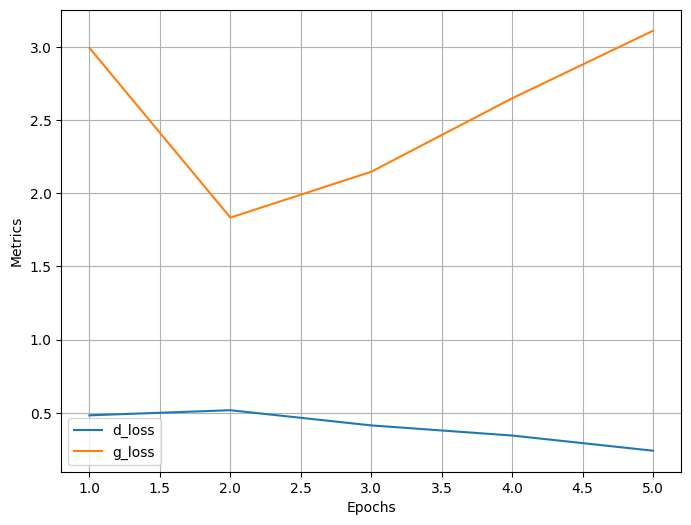

In [ ]:
for epoch in range(num_epochs):
    N = len(data_loader)
    for i, (images, _) in enumerate(data_loader):
        real_data = images.view(len(images), -1).to(device)
        fake_data = generator(noise(len(real_data))).to(device)
        fake_data = fake_data.detach()
        d_loss = discriminator_train_step(real_data, fake_data)
        fake_data = generator(noise(len(real_data))).to(device)
        g_loss = generator_train_step(fake_data)
        log.record(epoch+(1+i)/N, d_loss=d_loss.item(), g_loss=g_loss.item(), end='\r')
    log.report_avgs(epoch+1)
log.plot_epochs(['d_loss', 'g_loss'])

In [ ]:
# # Iterate through each epoch in the specified number of training epochs
# for epoch in range(num_epochs):
#     # Get the total number of batches in the data loader
#     N = len(data_loader)

#     # Iterate through each batch of data in the data loader
#     for i, (images, _) in enumerate(data_loader):
#         # Extract real data from the current batch and move it to the specified device
#         real_data = images.view(len(images), -1).to(device)

#         # Generate fake data using the generator model and move it to the specified device
#         fake_data = generator(noise(len(real_data))).to(device)

#         # Detach fake data to prevent gradients from flowing back to the generator
#         fake_data = fake_data.detach()

#         # Perform a discriminator training step using real and fake data
#         d_loss = discriminator_train_step(real_data, fake_data)

#         # Generate new fake data using the generator model for the next discriminator training step
#         fake_data = generator(noise(len(real_data))).to(device)

#         # Perform a generator training step using the newly generated fake data
#         g_loss = generator_train_step(fake_data)

#         # Record and display the current epoch, discriminator loss, and generator loss
#         log.record(epoch+(1+i)/N, d_loss=d_loss.item(), g_loss=g_loss.item(), end='\r')

#     # Report average losses at the end of each epoch
#     log.report_avgs(epoch+1)

# # Plot the evolution of discriminator and generator losses across epochs
# log.plot_epochs(['d_loss', 'g_loss'])


EPOCH: 1.000  g_loss: 3.248  d_loss: 0.357  (116.67s - 466.68s remaining)
EPOCH: 1.139  d_loss: 0.194  g_loss: 2.758  (119.06s - 403.65s remaining)

KeyboardInterrupt: 

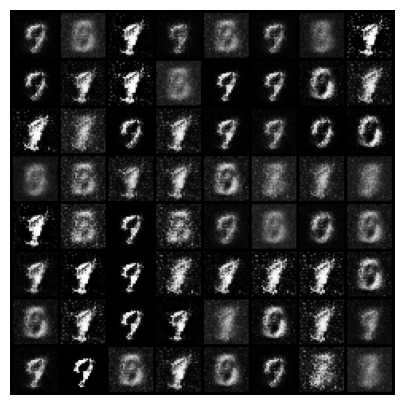

In [ ]:
z = torch.randn(64, 100).to(device) #64 samples, each with 100 features
sample_images = generator(z).data.cpu().view(64, 1, 28, 28)
grid = make_grid(sample_images, nrow=8, normalize=True)
show(grid.cpu().detach().permute(1,2,0), sz=5)

In [ ]:
# # Generate a tensor of random numbers sampled from a standard normal distribution
# # The tensor has a shape of (64, 100), representing 64 samples, each with 100 features
# z = torch.randn(64, 100).to(device)

# # Pass the random noise through the generator model to generate sample images
# # The generator outputs a tensor representing generated images
# # The `.data.cpu()` moves the generated images to the CPU for further processing
# # The `.view(64, 1, 28, 28)` reshapes the tensor to match the image dimensions (64 images, 1 channel, 28x28 pixels)
# sample_images = generator(z).data.cpu().view(64, 1, 28, 28)

# # Create a grid of sample images for visualization
# # The `make_grid` function arranges the images in a grid format with specified number of rows (`nrow`)
# # The `normalize=True` parameter scales the pixel values of the images to the range [0, 1]
# grid = make_grid(sample_images, nrow=8, normalize=True)

# # Display the grid of sample images
# # The `.cpu().detach().permute(1, 2, 0)` sequence of operations moves the grid to CPU, detaches it from computational graph, and permutes the dimensions to match the image format (HWC)
# # The `show` function displays the grid with specified size (`sz`)
# show(grid.cpu().detach().permute(1, 2, 0), sz=5)
